# Gapminder Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this report we are gone investagate data from  [Gapminder](https://www.gapminder.org/), an Swedish foundation independent educational non-proﬁt ﬁghting global misconceptions.

Used data overview:

- **Human development index**<br>
    Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.<br>
DataFrame:`hdi`

- **Population density**<br>
    Average number of people on each square km of land in the given country.<br>
DataFrame:`pop_dens`

- **CO2 emissions/person**<br>
    Carbon dioxide emissions from the burning of fossil fuels (Metric tonnes of C02 per person).<br>
DataFrame:`co2_em`

- **Mean years of school until 25-34 years old**<br>
    Average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.<br>
DataFrame:`mean_edu_male`

- **Income**<br>
    Gross Domestic Product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 PPP based on 2011 ICP).<br>
DataFrame:`income`    

- **Aged (15-24) employment rate percent**<br>
    Percentage of total population, age group 15-24, that has been employed during the given year.<br>
DataFrame:`emp_rate`

- **Life expectancy**<br>
    The average number of years anewborn child would live if current mortality patterns were to stay the same.<br>
DataFrame:`life_exp`




### Question(s) for Analysis
 I will try to use data to see the relationship between human development index (HDI) and other parameters to see the impact of human development on them and also  findout how each parameter change over years and with HDI. 

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# first we are loading our data

# CO2 emmision (tonns per year)
co2_em = pd.read_csv("co2_emissions_tonnes_per_person.csv")

# Population density  (1000 person per km)
pop_dens = pd.read_csv("population_density_per_square_km.csv")


# Life expectancy 
life_exp = pd.read_csv("life_expectancy_years.csv")

# Mean years in school (men between 15 and 24 years old)
mean_edu_male = pd.read_csv(r"mean_years_in_school_men_15_to_24_years.csv")

# Aged 15-24 employment rate
emp_rate = pd.read_csv(r"aged_15_24_employment_rate_percent.csv")

# Income
income = pd.read_csv(r"income_per_person_gdppercapita_ppp_inflation_adjusted.csv")


# Humna devolpment index
hdi = pd.read_csv(r"hdi_human_development_index.csv")

- **First display some data to check the data quality and tidness of data** 

In [3]:
co2_em.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590


In [4]:
pop_dens.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,211.00,213.0,216.00,223.00,232.00,243.00,255.00,268.00,281.00,...,576.0,575.0,574.0,573.0,572.0,572.0,571.0,570.0,569.0,568.0
1,Afghanistan,11.90,12.0,12.20,12.30,12.50,12.70,12.90,13.10,13.30,...,117.0,117.0,117.0,117.0,116.0,116.0,116.0,115.0,115.0,115.0
2,Angola,3.65,3.7,3.78,3.87,3.96,4.05,4.12,4.19,4.26,...,135.0,136.0,138.0,140.0,142.0,144.0,146.0,147.0,149.0,151.0
3,Anguilla,56.90,59.1,60.90,62.20,63.40,64.20,65.00,65.60,66.00,...,158.0,157.0,156.0,156.0,155.0,154.0,154.0,153.0,152.0,152.0
4,Albania,46.10,47.0,48.00,49.20,50.50,51.80,53.30,54.80,56.30,...,48.5,47.5,46.5,45.5,44.5,43.5,42.5,41.6,40.6,39.7


- **We have to restructure the data to make it tide and easy to use**

In [5]:
#reshape dataframes
co2_em=pd.melt(co2_em, id_vars=['country'],var_name='year', value_name='co2_emission').sort_values(by =['country','year']).reset_index(drop=True)
co2_em

,country,year,co2_emission
0,Afghanistan,1800,NaN
1,Afghanistan,1801,NaN
2,Afghanistan,1802,NaN
3,Afghanistan,1803,NaN
4,Afghanistan,1804,NaN
...,...,...,...
42481,Zimbabwe,2014,0.881
42482,Zimbabwe,2015,0.881
42483,Zimbabwe,2016,0.771
42484,Zimbabwe,2017,0.845


In [6]:
pop_dens=pd.melt(pop_dens, id_vars=['country'],var_name='year', value_name='pop_dens').sort_values(by =['country','year']).reset_index(drop=True)
pop_dens

,country,year,pop_dens
0,Afghanistan,1950,11.9
1,Afghanistan,1951,12.0
2,Afghanistan,1952,12.2
3,Afghanistan,1953,12.3
4,Afghanistan,1954,12.5
...,...,...,...
35329,Zimbabwe,2096,80.0
35330,Zimbabwe,2097,80.0
35331,Zimbabwe,2098,80.0
35332,Zimbabwe,2099,80.0


In [7]:
life_exp=pd.melt(life_exp, id_vars=['country'],var_name='year', value_name='life_exp').sort_values(by =['country','year']).reset_index(drop=True)
life_exp

,country,year,life_exp
0,Afghanistan,1800,28.2
1,Afghanistan,1801,28.2
2,Afghanistan,1802,28.2
3,Afghanistan,1803,28.2
4,Afghanistan,1804,28.2
...,...,...,...
58690,Zimbabwe,2096,73.9
58691,Zimbabwe,2097,74.0
58692,Zimbabwe,2098,74.2
58693,Zimbabwe,2099,74.3


In [8]:
mean_edu_male =pd.melt(mean_edu_male, id_vars=['country'],var_name='year', value_name='mean_edu_male').sort_values(by =['country','year']).reset_index(drop=True)
mean_edu_male

,country,year,mean_edu_male
0,Afghanistan,1970,1.82
1,Afghanistan,1971,1.87
2,Afghanistan,1972,1.92
3,Afghanistan,1973,1.97
4,Afghanistan,1974,2.02
...,...,...,...
8643,Zimbabwe,2011,10.00
8644,Zimbabwe,2012,10.10
8645,Zimbabwe,2013,10.30
8646,Zimbabwe,2014,10.40


In [9]:
emp_rate = pd.melt(emp_rate, id_vars=['country'],var_name='year', value_name='emp_rate').sort_values(by =['country','year']).reset_index(drop=True)
emp_rate

,country,year,emp_rate
0,Afghanistan,1991,35.9
1,Afghanistan,1992,37.5
2,Afghanistan,1993,35.7
3,Afghanistan,1994,35.8
4,Afghanistan,1995,39.8
...,...,...,...
6043,Zimbabwe,2018,67.9
6044,Zimbabwe,2019,68.2
6045,Zimbabwe,2020,68.4
6046,Zimbabwe,2021,68.6


In [10]:
income = pd.melt(income , id_vars=['country'],var_name='year', value_name='income').sort_values(by =['country','year']).reset_index(drop=True)
income

,country,year,income
0,Afghanistan,1800,674.0
1,Afghanistan,1801,674.0
2,Afghanistan,1802,674.0
3,Afghanistan,1803,674.0
4,Afghanistan,1804,674.0
...,...,...,...
48940,Zimbabwe,2046,3880.0
48941,Zimbabwe,2047,3960.0
48942,Zimbabwe,2048,4050.0
48943,Zimbabwe,2049,4130.0


In [11]:
hdi =pd.melt(hdi, id_vars=['country'],var_name='year', value_name='hdi').sort_values(by =['country','year']).reset_index(drop=True)
hdi

,country,year,hdi
0,Afghanistan,1990,0.298
1,Afghanistan,1991,0.304
2,Afghanistan,1992,0.312
3,Afghanistan,1993,0.308
4,Afghanistan,1994,0.303
...,...,...,...
5476,Zimbabwe,2014,0.537
5477,Zimbabwe,2015,0.544
5478,Zimbabwe,2016,0.549
5479,Zimbabwe,2017,0.553


- **Now to make the data more tide and easy to deal with we have to put all data in one dataframe**

In [12]:
#put all data frames in one list 
df_list=[co2_em, pop_dens, life_exp, mean_edu_male, emp_rate, income, hdi]

# use reduce and merge to add all data frames in the list to one data frame 
main =reduce(lambda  left,right: pd.merge(left,right,on=['country', 'year'],how='inner'), df_list).sort_values(by = ['country', 'year']).reset_index(drop = True)

- **Now check the new data frame**

In [13]:
main

,country,year,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
0,Afghanistan,1991,0.183,20.4,53.8,3.05,35.9,1010.0,0.304
1,Afghanistan,1992,0.0954,22.2,54.2,3.13,37.5,971.0,0.312
2,Afghanistan,1993,0.0844,24.2,54.4,3.20,35.7,665.0,0.308
3,Afghanistan,1994,0.0752,26.2,53.9,3.28,35.8,493.0,0.303
4,Afghanistan,1995,0.068,27.7,54.3,3.36,39.8,728.0,0.327
...,...,...,...,...,...,...,...,...,...
4420,Zimbabwe,2011,0.737,33.3,54.4,10.00,67.5,2560.0,0.490
4421,Zimbabwe,2012,0.587,33.9,56.0,10.10,67.5,2930.0,0.516
4422,Zimbabwe,2013,0.872,34.5,57.2,10.30,67.6,2940.0,0.527
4423,Zimbabwe,2014,0.881,35.1,58.0,10.40,67.7,2960.0,0.537


In [14]:
#check the start year and end year of data
main.year.min() , main.year.max()

('1991', '2015')

- **After make sure the data is tide we need to clean the data**

In [15]:
#check data type for each cloumn
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        4425 non-null   object 
 1   year           4425 non-null   object 
 2   co2_emission   4411 non-null   object 
 3   pop_dens       4425 non-null   float64
 4   life_exp       4425 non-null   float64
 5   mean_edu_male  4425 non-null   float64
 6   emp_rate       4425 non-null   float64
 7   income         4425 non-null   float64
 8   hdi            4081 non-null   float64
dtypes: float64(6), object(3)
memory usage: 311.3+ KB


In [16]:
#change co2_emission data type
main.co2_emission=main.co2_emission.astype('float')

In [17]:
#make sure the data type is changed 
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        4425 non-null   object 
 1   year           4425 non-null   object 
 2   co2_emission   4411 non-null   float64
 3   pop_dens       4425 non-null   float64
 4   life_exp       4425 non-null   float64
 5   mean_edu_male  4425 non-null   float64
 6   emp_rate       4425 non-null   float64
 7   income         4425 non-null   float64
 8   hdi            4081 non-null   float64
dtypes: float64(7), object(2)
memory usage: 311.3+ KB


In [18]:
#check missing data
main.isnull().any()

country          False
year             False
co2_emission      True
pop_dens         False
life_exp         False
mean_edu_male    False
emp_rate         False
income           False
hdi               True
dtype: bool

In [19]:
#interpolate null values
main = main.interpolate(method='linear', axis=0)
main.head()

,country,year,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
0,Afghanistan,1991,0.1830,20.4,53.8,3.05,35.9,1010.0,0.304
1,Afghanistan,1992,0.0954,22.2,54.2,3.13,37.5,971.0,0.312
2,Afghanistan,1993,0.0844,24.2,54.4,3.20,35.7,665.0,0.308
3,Afghanistan,1994,0.0752,26.2,53.9,3.28,35.8,493.0,0.303
4,Afghanistan,1995,0.0680,27.7,54.3,3.36,39.8,728.0,0.327


In [20]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        4425 non-null   object 
 1   year           4425 non-null   object 
 2   co2_emission   4425 non-null   float64
 3   pop_dens       4425 non-null   float64
 4   life_exp       4425 non-null   float64
 5   mean_edu_male  4425 non-null   float64
 6   emp_rate       4425 non-null   float64
 7   income         4425 non-null   float64
 8   hdi            4425 non-null   float64
dtypes: float64(7), object(2)
memory usage: 311.3+ KB


In [21]:
#check for duplicated values
main.duplicated().any()

False

In [22]:
#save final datafarme to use it in data analysis
main.to_csv(r"final.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### How each metric change over years ?
I will display every metric over years to see their behavior using the mean of each one. 

In [23]:
main=pd.read_csv('final.csv')
main.head()

,country,year,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
0,Afghanistan,1991,0.1830,20.4,53.8,3.05,35.9,1010.0,0.304
1,Afghanistan,1992,0.0954,22.2,54.2,3.13,37.5,971.0,0.312
2,Afghanistan,1993,0.0844,24.2,54.4,3.20,35.7,665.0,0.308
3,Afghanistan,1994,0.0752,26.2,53.9,3.28,35.8,493.0,0.303
4,Afghanistan,1995,0.0680,27.7,54.3,3.36,39.8,728.0,0.327


In [24]:
#first creat table to see the change of each parameter over years by droping country column and calculate mean of every column every year  


main_average=main.drop(columns=['country'],axis='country').groupby('year').mean()
main_average.head(5)


,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
year,,,,,,,
1991,4.598561,128.666780,66.224294,7.223277,43.130508,12117.305085,0.612840
1992,4.562906,130.879209,66.327119,7.334859,42.841243,12133.542373,0.610533
1993,4.615845,133.100282,66.296610,7.444237,42.197740,12194.112994,0.610090
1994,4.584678,135.438079,66.132203,7.554746,41.840678,12439.610169,0.609387
1995,4.498245,137.780226,66.411864,7.665424,41.606215,12766.751412,0.610362


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

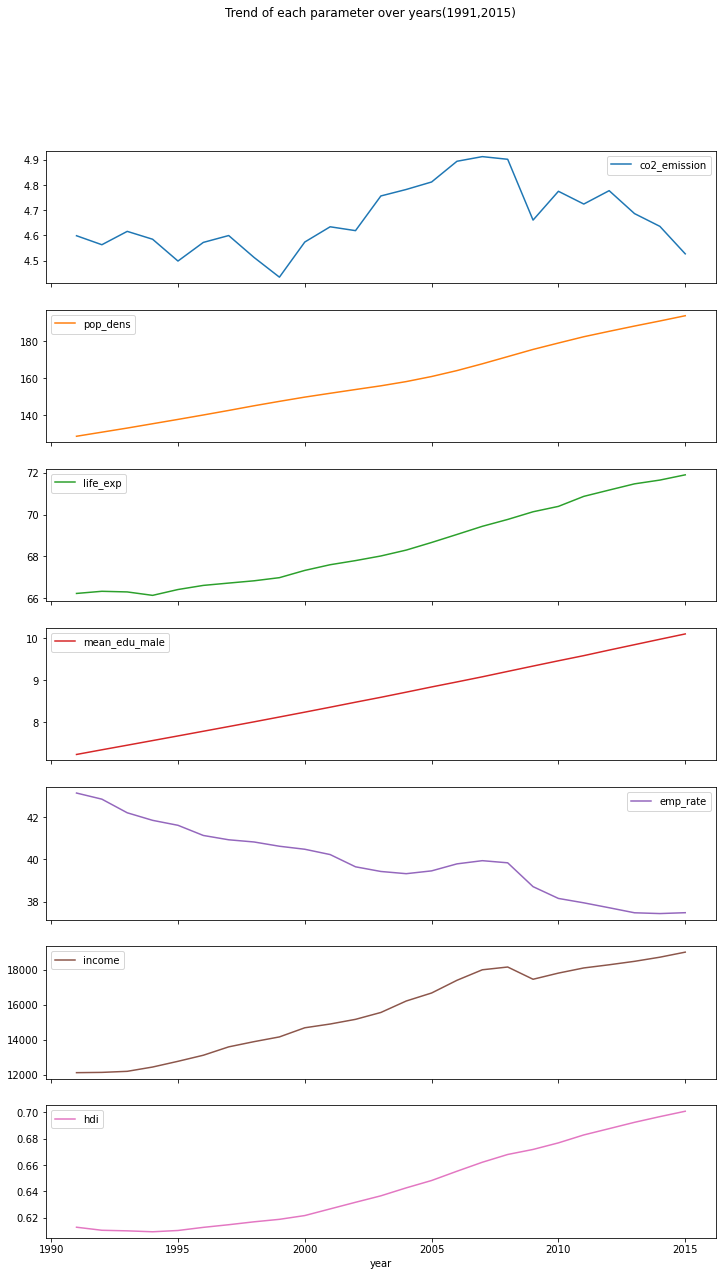

In [25]:
# make plot for every parameter 

main_average.plot(subplots=True,figsize=(12,20), title='Trend of each parameter over years(1991,2015)',sharex=True)

- **We can see that all metrics are increased over years except `Co2 emission`, `Aged (15-24) employment rate percent` and `Income`.**
- **`Income` droped at 2008 during world economic crisis and then start to increased again also we can see the `co2 emission` is started to flactuate during this crisis.**

### How each metric change from 1991 to 2015 ?
Using histograms we will try to see how each parameter change from 1991 to 2015. 

In [26]:
#Make table of year 1991
main_91=main.groupby(['country','year']).max().query('year==1991')
main_91.describe()

,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,4.598561,128.666780,66.224294,7.223277,43.130508,12117.305085,0.612840
std,6.180039,360.115322,8.593254,2.467729,14.219492,13877.923962,0.166922
min,0.004650,1.430000,47.000000,1.670000,14.000000,482.000000,0.217000
25%,0.416000,19.000000,60.200000,5.290000,33.200000,2400.000000,0.491000
50%,1.820000,51.100000,68.900000,7.430000,42.200000,6690.000000,0.642000
75%,6.870000,114.000000,72.500000,9.100000,52.200000,15200.000000,0.736385
max,36.200000,4430.000000,79.600000,12.400000,86.900000,72700.000000,0.923600


In [27]:
#Make table of year 2015

main_15=main.groupby(['country','year']).max().query('year==2015')
main_15.describe()

,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,4.526799,193.852203,71.907345,10.098701,37.477401,19009.706215,0.700927
std,5.983312,638.543335,7.622686,2.603642,14.998737,19953.290962,0.153991
min,0.036700,1.930000,48.500000,3.020000,11.100000,825.000000,0.360000
25%,0.649000,31.100000,66.300000,8.210000,26.700000,4190.000000,0.568000
50%,2.450000,77.500000,73.300000,10.500000,36.600000,11900.000000,0.721000
75%,5.990000,143.000000,77.400000,12.100000,47.200000,27900.000000,0.827000
max,41.300000,7990.000000,84.300000,15.200000,75.700000,111000.000000,0.948000


In [28]:
#Make function to draw histogram plots  
def hist_drawing(parameter,start,x,y,title,xlable,ylable):
    fig, ax = plt.subplots(figsize = (8, 8))
    bin_edges = np.arange(start, main[parameter].max()+x, y)
    ax.hist(main_91[parameter], bins = bin_edges, alpha = 1, label = '1991')
    ax.hist(main_15[parameter], bins = bin_edges, alpha = 0.5, label = '2015')
    ax.set_title(title)
    ax.set_xlabel(xlable)
    ax.set_ylabel(ylable)
    ax.legend(loc = 'upper right')
    plt.show()

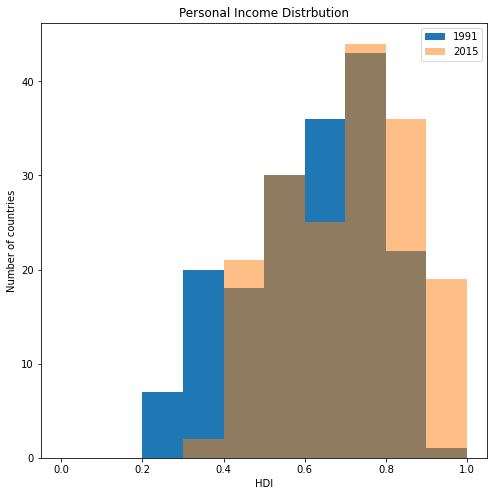

In [29]:
#income distribution between 1991 and 2015
hist_drawing('hdi',0,.1,.1,'Personal Income Distrbution','HDI','Number of countries')

- **We can Notice that we have increase in `HDI` from 1991 to 2015 with almost no countries under 0.4 only 2 countries**

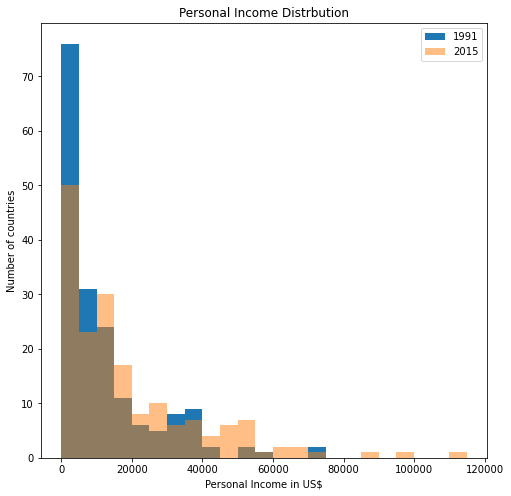

In [30]:
#income distribution between 1991 and 2015
hist_drawing('income',0,5000,5000,'Personal Income Distrbution','Personal Income in US$','Number of countries')


- **we can see most countries at 1991 had `Personal Income` between 0 and 5000$ which still the same at 2015 but we can see we have more coutries have income above 10K$ also we can see the noumber of countries have more than 40K$ is increased**

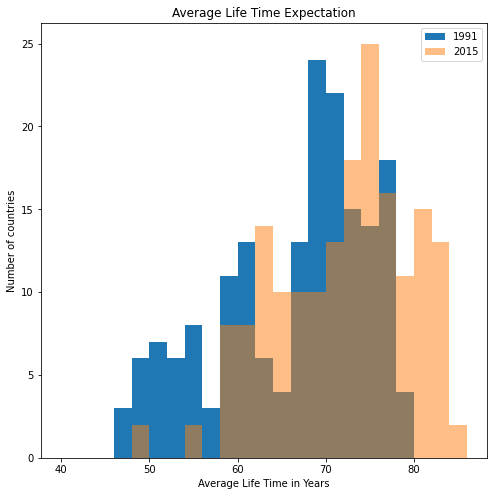

In [31]:
#Life time change between 1991 and 2015
hist_drawing('life_exp',40,2,2,'Average Life Time Expectation','Average Life Time in Years','Number of countries')


- **We can see that the `average life time` is increased for all countries while at 1991 most countries have average life time about 65 years at 2015 increased to 75**

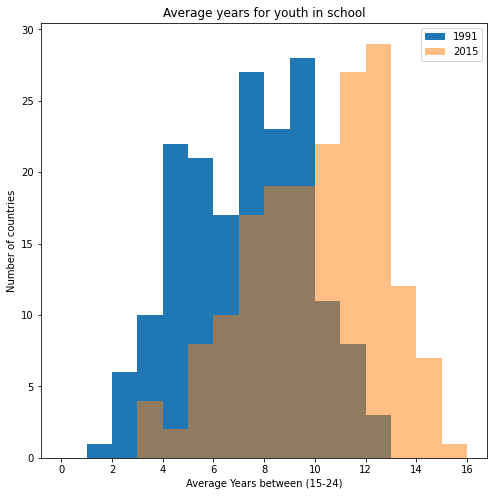

In [32]:
#How the average years in education change between 1991 and 2015

hist_drawing('mean_edu_male',0,1,1,'Average years for youth in school','Average Years between (15-24)','Number of countries')



- **We can see that youth spent more years at education at 2015 most countries have people spend  11 to 13 years in school while at 1991 people spent average 7 to 10 years in school**

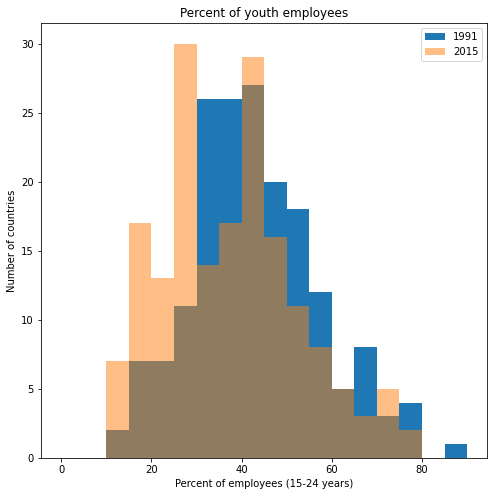

In [33]:
#Percent of youth empolyment 

hist_drawing('emp_rate',0,5,5,'Percent of youth employees','Percent of employees (15-24 years)','Number of countries')



- **we can notice that the percent of youth employee is slightly decreased**

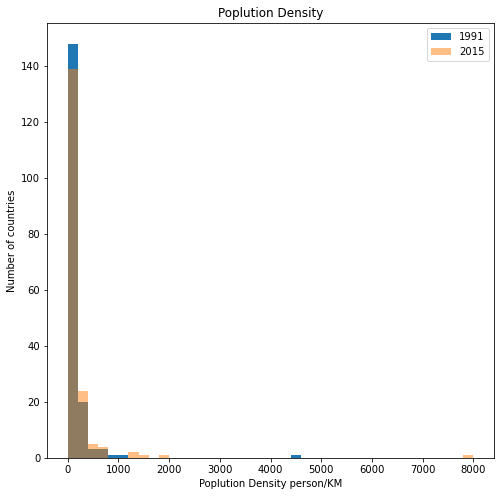

In [34]:
#Population density change 

hist_drawing('pop_dens',0,200,200,'Poplution Density','Poplution Density person/KM','Number of countries')


- **most countries still have same density about 100 person per kilometer but we can see slightly increase in countries which have about 200  person and more in kilometer** 

### how HDI  affect by other paramters ?
HDI is contains three dimensions: health level, educational level and living standard. so we will try to find relationship between HDI and some paramters to understand how they effect on HDI

In [35]:
#Define the Highst and the lowest countries in human devolpment index in 2015

Highst_5_coutries_hdi=main_15.groupby('country').max()['hdi'].sort_values(ascending = False)[:5]
Lowest_5_coutries_hdi=main_15.groupby('country').min()['hdi'].sort_values(ascending = True)[:5]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


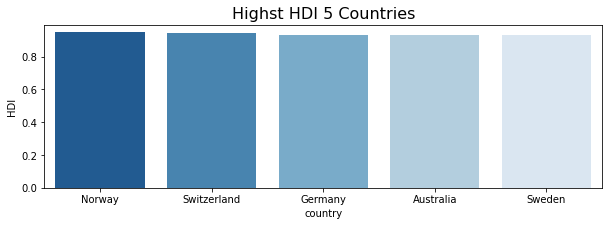

In [36]:
#draw bar plot to see the Highst HDI countries 
plt.figure(figsize = (10,3))
sns.barplot(Highst_5_coutries_hdi.index, Highst_5_coutries_hdi.values, orient='v', palette="Blues_r" )
plt.title('Highst HDI 5 Countries', fontsize = 16)
plt.ylabel('HDI', fontsize = 10);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


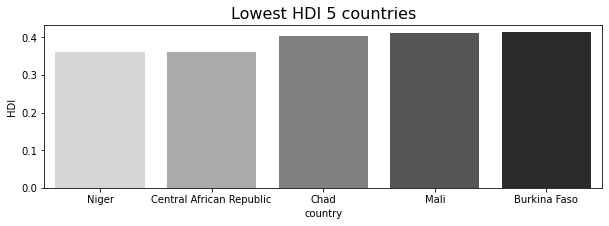

In [37]:
plt.figure(figsize = (10,3))
sns.barplot(Lowest_5_coutries_hdi.index, Lowest_5_coutries_hdi.values, orient='v', palette="gist_gray_r" )
plt.title('Lowest HDI 5 countries', fontsize = 16)
plt.ylabel('HDI', fontsize = 10);

In [38]:
#Make seperated dataframe of lowest and highest HDI countries  
list_of_countries=['Switzerland', 'Germany', 'Australia', 'Sweden', 'Norway','Chad', 'Central African Republic', 'Niger', 'Mali', 'Burkina Faso']
main_coutries=main[main['country'].isin(list_of_countries)]

In [39]:
#Make dataframe of 2015
main_countries_15=main_coutries.groupby(['country','year']).min().query('year==2015')

In [40]:
#sort countries by HDI value
main_countries_15.sort_values(by=['hdi'], inplace=True, ascending=False)
main_countries_15

,,co2_emission,pop_dens,life_exp,mean_edu_male,emp_rate,income,hdi
country,year,,,,,,,
Norway,2015,8.7200,14.20,82.4,14.10,50.5,63200.0,0.948
Switzerland,2015,4.6700,210.00,83.6,11.50,61.7,65900.0,0.943
Australia,2015,16.8000,3.12,82.7,14.70,58.5,47800.0,0.933
Germany,2015,9.7400,235.00,80.9,12.70,45.6,51200.0,0.933
Sweden,2015,4.4100,23.80,82.5,14.20,44.8,51100.0,0.932
Burkina Faso,2015,0.1820,66.20,59.9,3.76,47.8,1930.0,0.413
Mali,2015,0.1780,14.30,59.9,3.76,49.3,2140.0,0.412
Chad,2015,0.0694,11.20,58.8,5.08,50.3,1860.0,0.403
Central African Republic,2015,0.0653,7.21,49.7,6.79,47.8,853.0,0.362


In [41]:
#creat function to draw bar plots

def barplot_drawing(y,title,ylabel):

    plt.figure(figsize = (10, 7))
    sns.barplot(data = main_countries_15.reset_index(), x = 'country', y = y, palette="mako_r" )

    plt.title(title, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15);
    plt.xticks(rotation = 90, fontsize = 12)


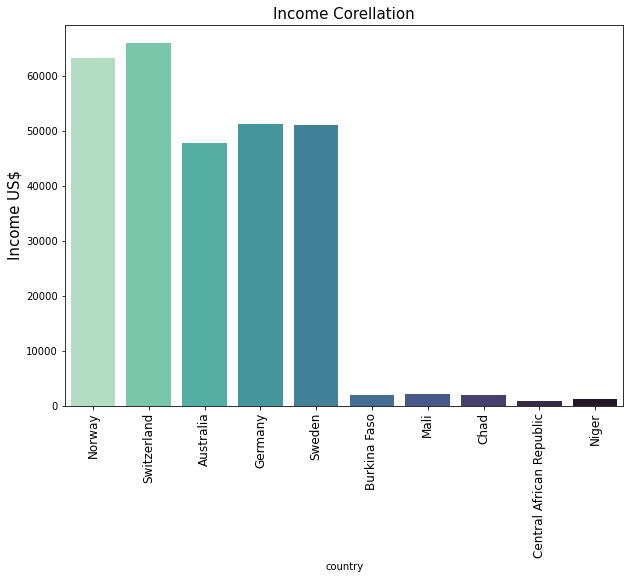

In [42]:
#show how some parameters change from country to country

barplot_drawing('income','Income Corellation','Income US$')

- **we can see countries with high `HDI` have more `personal Income`**

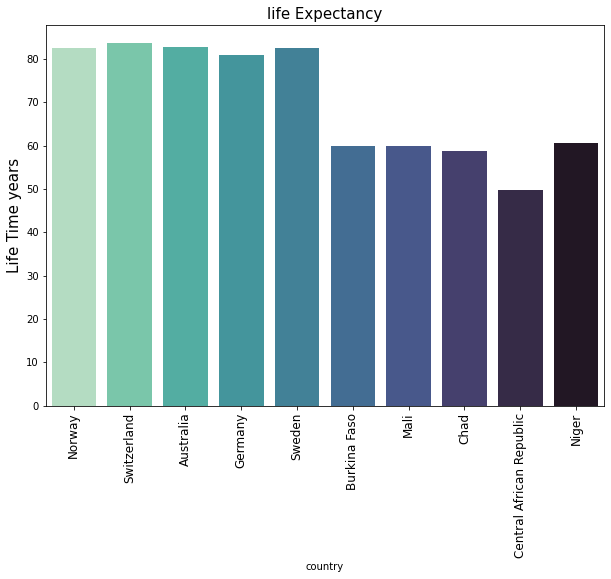

In [43]:
barplot_drawing('life_exp','life Expectancy','Life Time years')

- **we can see countries with high `HDI` have more `average life time`**

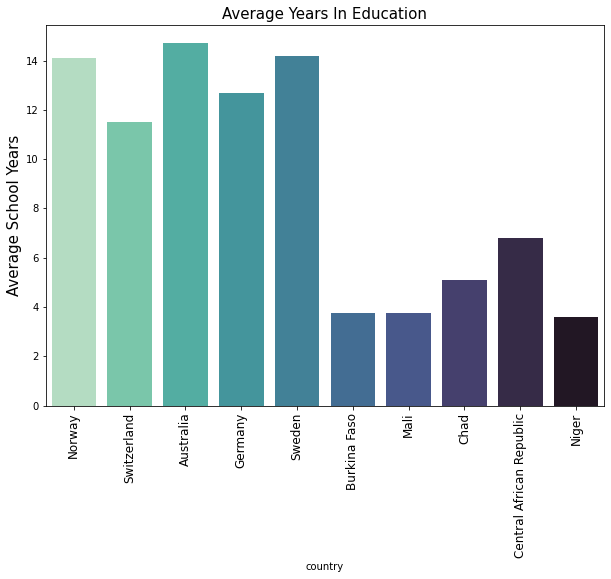

In [44]:
barplot_drawing('mean_edu_male','Average Years In Education','Average School Years')

- **We can see countries with high `HDI` have more `Average school years`**

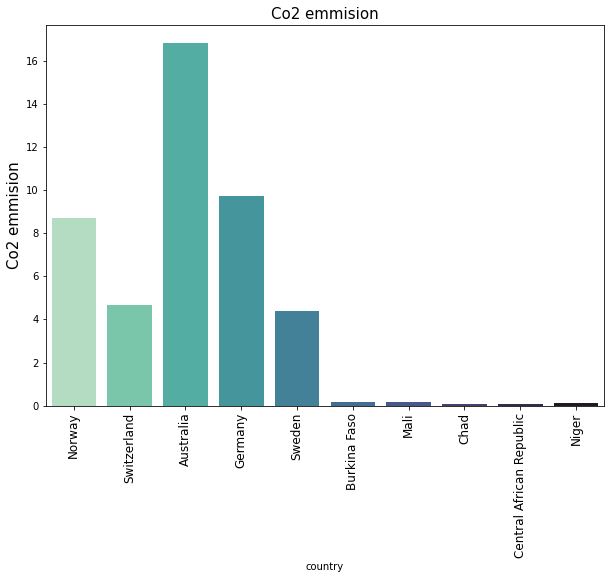

In [45]:
barplot_drawing('co2_emission','Co2 emmision','Co2 emmision')

- **With increase in `HDI` we have increase in `Co2 emisions`**

### what is the impact of Income and Population density on CO2 emissions?
we will try to find if there is any relation petween population ,income and CO2 emissions.

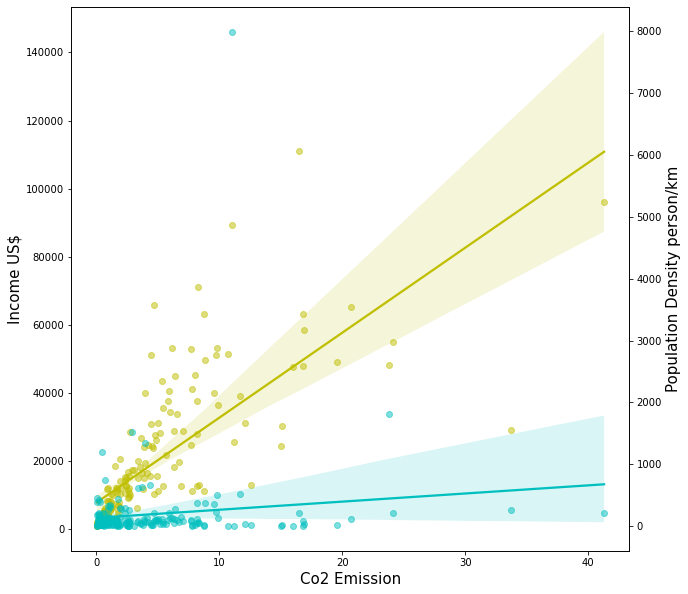

In [46]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
sns.regplot(data=main_15, x='co2_emission', y='income',fit_reg=True,scatter_kws={'alpha':0.5},label='Income', ax=ax1,color='y')
sns.regplot(data=main_15, x='co2_emission', y='pop_dens',fit_reg=True,scatter_kws={'alpha':0.5},label='Population_dens', ax=ax2,color='c')
ax1.set_xlabel('Co2 Emission',size=15)
ax1.set_ylabel('Income US$', size=15)
ax2.set_ylabel('Population Density person/km', size=15)
plt.show()


- **`CO2 emission` is slightly increase  with  `Population density` but not much.**
- **`CO2 emission` have clear increase eith increase of `Incom`**

<a id='conclusions'></a>
## Conclusions


- **HDI** is increased in all countries over years and this logic due to increase in **Health Services** , **Education Quality** and **Income** in most countries.

- **Life Expectancy** increased for all countries which is an indication for increase in **Health** spendings so we need more data about health care in each country to know exactly how this effect on average life time.

- **Income** increased for all countries but we need more data about inflution to see is this increase has any effect on the life standards or not.



- Also decrease in percent of **Youth Employees** may be due to increase of **Average Education Years**.



- Icrease in **CO2 emissions** with **income** is logic because with increase in income people spend more on luxury housing which need more **Electricty** also increase in **Transportation** ways whis is sources of CO2 emmisions as per *US Environmental Protection Agency*.

<a id='limit'></a>
## Limitations


- **CO2 emissions** data is not compeleted and we need more data to make further study on causes of increase of emission and the see the main causes of it.
- data is limited from 1991 to 2015 if we need deeper study we need more data and more metrics
- Various correlation analysis between variables have been performed in this project, but since the correlation does not imply causation, further analysis should be done.


<a id='ref'></a>
## References


[1] https://github.com/

[2] https://pandas.pydata.org/

[3] https://stackoverflow.com/

[4] https://matplotlib.org/

[5] https://seaborn.pydata.org/

[9] https://warmheartworldwide.org/

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1